In [56]:
# Install packages that aren't available by default in google colab
!pip install -q pydicom

In [57]:
!pip install pydicom
import matplotlib.pyplot as plt

In [58]:
pip install dicom

In [59]:
pip install --trusted-host pypi.python.org --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1.1)


In [60]:
import numpy as np
import pandas as pd
import pydicom as npydicom
from PIL import Image
import matplotlib.pyplot as plt
import os
import csv
from csv import writer
from tqdm import tqdm
#import tryy
import cv2
import pydicom
#import random
#import pydicom as dicomio
from os.path import join  
import dicom 
import numpy

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
Capstone_Project_Path= "/content/drive/My Drive/Colab Notebooks/Capstone Project:- Pneumonia /data from Akshay/"

In [63]:
#paths on pc
train_dir = r'/content/drive/My Drive/Colab Notebooks/Capstone Project:- Pneumonia /data from Akshay/stage_2_train_images/'
#folder_path = r'/content/drive/My Drive/Colab Notebooks/Capstone Project:- Pneumonia /data from Akshay/stage_2_train_images'
#imgs = os.listdir(folder_path)

##**EDA**##

In [64]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%cd {Capstone_Project_Path}


class_1= pd.read_csv('stage_2_detailed_class_info.csv')

/content/drive/My Drive/Colab Notebooks/Capstone Project:- Pneumonia /data from Akshay


In [65]:
class_1.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [66]:
class_1.shape

(30227, 2)

In [67]:
train_label=pd.read_csv(Capstone_Project_Path +'stage_2_train_labels.csv')

In [68]:
train_label.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [69]:
train_label.shape

(30227, 6)

In [70]:
#Dealing with missing values
def check_data(dataframe):
  print('\nIs NA:\n',dataframe.isna().sum())
  print('\nUnique Patients:\n',len(dataframe['patientId'].unique()))


In [71]:
check_data(class_1)
check_data(train_label)


Is NA:
 patientId    0
class        0
dtype: int64

Unique Patients:
 26684

Is NA:
 patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

Unique Patients:
 26684


**Above data imples that for 20.6K patients x & y values are missing** 

 **Above data have 26.6K unique patients data**


In [72]:
class_1_train_label_integrating = train_label.merge(class_1, left_on='patientId', right_on='patientId', how='inner')

In [73]:
class_1_train_label_integrating.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [74]:
check_data(class_1_train_label_integrating)


Is NA:
 patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

Unique Patients:
 26684


In [75]:
print(class_1_train_label_integrating[class_1_train_label_integrating['Target'] == 0].isna().sum())

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64


In [76]:
print(class_1_train_label_integrating[class_1_train_label_integrating['class'] == 'Normal'].isna().sum())

patientId       0
x            8851
y            8851
width        8851
height       8851
Target          0
class           0
dtype: int64


There are total 8851 missing values for Normal class

In [77]:
print(class_1_train_label_integrating[class_1_train_label_integrating['class'] == 'No Lung Opacity / Not Normal'].isna().sum())

patientId        0
x            11821
y            11821
width        11821
height       11821
Target           0
class            0
dtype: int64


There are total 11821 missing values for No Lung Opacity / Not Normal class

In [78]:
print(class_1_train_label_integrating[class_1_train_label_integrating['class'] == 'Lung Opacity'].isna().sum())

patientId    0
x            0
y            0
width        0
height       0
Target       0
class        0
dtype: int64


There are no missing values for Lung Opacity class

In [79]:
sns.set_style("dark")

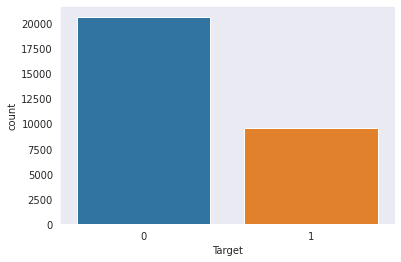

In [80]:
sns.countplot(train_label['Target'])


In [81]:
train_label['Target'].count()

30227

In [82]:
train_label.groupby(['Target']).count() 

,patientId,x,y,width,height
Target,,,,,
0,20672,0,0,0,0
1,9555,9555,9555,9555,9555


From total patients data of 30227, 9555 patients are having Lung opacity

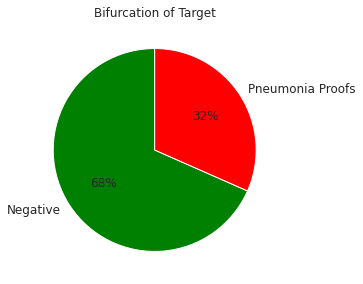

In [83]:
# Bifurcation of Target & Class
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(121)
g = (train_label['Target'].value_counts()
    .plot(kind = 'pie', autopct = '%.0f%%', 
          labels = ['Negative', 'Pneumonia Proofs'], 
          colors = ['green', 'red'], 
          startangle = 90, 
          title = 'Bifurcation of Target', fontsize = 12)
    .set_ylabel(''))

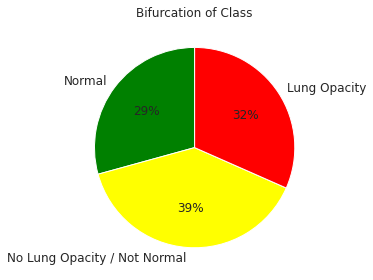

In [84]:
ax = fig.add_subplot(122)
g = (class_1['class'].value_counts().sort_index(ascending = False)
    .plot(kind = 'pie', autopct = '%.0f%%', 
          colors = ['green', 'yellow', 'red'], 
          startangle = 90, title = 'Bifurcation of Class', 
          fontsize = 12)
    .set_ylabel(''))
plt.tight_layout()

In [85]:
sample_sub=pd.read_csv(Capstone_Project_Path +'stage_2_sample_submission.csv')                                          

In [86]:
sample_sub.head()

,patientId,PredictionString
0,0000a175-0e68-4ca4-b1af-167204a7e0bc,0.5 0 0 100 100
1,0005d3cc-3c3f-40b9-93c3-46231c3eb813,0.5 0 0 100 100
2,000686d7-f4fc-448d-97a0-44fa9c5d3aa6,0.5 0 0 100 100
3,000e3a7d-c0ca-4349-bb26-5af2d8993c3d,0.5 0 0 100 100
4,00100a24-854d-423d-a092-edcf6179e061,0.5 0 0 100 100


In [87]:
print('PatientId is linked with {} class'.format(class_1.groupby(['patientId'])['class'].nunique().max()))

PatientId is linked with 1 class


In [88]:
boundingboxes = train_label.groupby('patientId').size().to_frame('number_of_boxes').reset_index()
train_label = train_label.merge(boundingboxes, on = 'patientId', how = 'right')
print('\nNumber of patientIDs per boundingboxes in the dataset')
(boundingboxes.groupby('number_of_boxes')
.size()
.to_frame('number_of_patientIDs_per_boxes')
.reset_index()
.set_index('number_of_boxes')
.sort_values(by = 'number_of_boxes'))


Number of patientIDs per boundingboxes in the dataset


,number_of_patientIDs_per_boxes
number_of_boxes,
1,23286
2,3266
3,119
4,13


### Summarization from CSV
1. Out of 30227 patient IDs, 26684 patients are having unique IDs. This means that remaining are duplicates.
2. As per our understanding, CSV data has patient IDs and Bounding boxes.
3. Class variable contains No Lung Opacity/Not Normal, Normal and Lung Opacity.
4. Out of Given patient data, 32% people have Pneumonia Proofs/Symptoms.

In [89]:
import pydicom as dcm
import codecs

In [90]:
sample_patient_id = train_label['patientId'][1]
dcm_file = train_dir + '{}.dcm'.format(sample_patient_id)

In [91]:
dcm_data = dcm.read_file(dcm_file)

In [92]:
print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.26024.1517874469.23011
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.26024.1517874469.23011
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [93]:
def load_image(imagename):
  image1 = pydicom.dcmread(imagename)
  print(type(image1))
  return image1

In [94]:
import numpy as np
data = np.load('resized_train_images.npy', allow_pickle=True)

In [95]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import csv
from glob import glob
import sys
#csv.field_size_limit(sys.maxsize)
import ctypes as ct

In [96]:
#b = pd.read_csv(Capstone_Project_Path +'new.csv')

In [97]:
path = "/content/drive/My Drive/Colab Notebooks/Capstone Project:- Pneumonia /data from Akshay/new.csv"
#df_bonus = pd.read_csv(path, engine="python")
b = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,4,6,7,8,11,12,15,19,21,22,25,28,30,31,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [98]:
b.head()

,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ConversionType,HighBit,InstanceNumber,LossyImageCompression,LossyImageCompressionMethod,Modality,PatientAge,PatientBirthDate,PatientID,PatientName,PatientOrientation,PatientSex,PhotometricInterpretation,PixelData,PixelRepresentation,PixelSpacing,ReferringPhysicianName,Rows,SOPClassUID,SOPInstanceUID,SamplesPerPixel,SeriesDescription,SeriesInstanceUID,SeriesNumber,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime,ViewPosition
0,NaN,8,8,CHEST,1024,WSD,7,1,1,ISO_10918_1,CR,51,NaN,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,F,MONOCHROME2,b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...,0,"[0.14300000000000002, 0.14300000000000002]",NaN,1024,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.28530.15178744...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.28530.15178744...,1,ISO_IR 100,19010101,NaN,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,0,PA
1,NaN,8,8,CHEST,1024,WSD,7,1,1,ISO_10918_1,CR,19,NaN,000924cf-0f8d-42bd-9158-1af53881a557,000924cf-0f8d-42bd-9158-1af53881a557,NaN,F,MONOCHROME2,b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...,0,"[0.139, 0.139]",NaN,1024,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.20023.15178744...,1,view: AP,1.2.276.0.7230010.3.1.3.8323329.20023.15178744...,1,ISO_IR 100,19010101,NaN,1.2.276.0.7230010.3.1.2.8323329.20023.15178744...,0,AP
2,NaN,8,8,CHEST,1024,WSD,7,1,1,ISO_10918_1,CR,25,NaN,000db696-cf54-4385-b10b-6b16fbb3f985,000db696-cf54-4385-b10b-6b16fbb3f985,NaN,F,MONOCHROME2,b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...,0,"[0.168, 0.168]",NaN,1024,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.4475.151787430...,1,view: AP,1.2.276.0.7230010.3.1.3.8323329.4475.151787430...,1,ISO_IR 100,19010101,NaN,1.2.276.0.7230010.3.1.2.8323329.4475.151787430...,0,AP
3,NaN,8,8,CHEST,1024,WSD,7,1,1,ISO_10918_1,CR,40,NaN,000fe35a-2649-43d4-b027-e67796d412e0,000fe35a-2649-43d4-b027-e67796d412e0,NaN,M,MONOCHROME2,b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...,0,"[0.171, 0.171]",NaN,1024,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.25090.15178744...,1,view: AP,1.2.276.0.7230010.3.1.3.8323329.25090.15178744...,1,ISO_IR 100,19010101,NaN,1.2.276.0.7230010.3.1.2.8323329.25090.15178744...,0,AP
4,NaN,8,8,CHEST,1024,WSD,7,1,1,ISO_10918_1,CR,57,NaN,001031d9-f904-4a23-b3e5-2c088acd19c6,001031d9-f904-4a23-b3e5-2c088acd19c6,NaN,M,MONOCHROME2,b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...,0,"[0.139, 0.139]",NaN,1024,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.9271.151787434...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.9271.151787434...,1,ISO_IR 100,19010101,NaN,1.2.276.0.7230010.3.1.2.8323329.9271.151787434...,0,PA


In [99]:
b.shape

(26687, 35)

In [104]:
 Entiredata = class_1_train_label_integrating.merge(b, left_on='patientId', right_on='PatientID', how='inner')

In [106]:
Entiredata.head()

,patientId,x,y,width,height,Target,class,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ConversionType,HighBit,InstanceNumber,LossyImageCompression,LossyImageCompressionMethod,Modality,PatientAge,PatientBirthDate,PatientID,PatientName,PatientOrientation,PatientSex,PhotometricInterpretation,PixelData,PixelRepresentation,PixelSpacing,ReferringPhysicianName,Rows,SOPClassUID,SOPInstanceUID,SamplesPerPixel,SeriesDescription,SeriesInstanceUID,SeriesNumber,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,NaN,8,8,CHEST,1024,WSD,7,1,1,ISO_10918_1,CR,51,NaN,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,F,MONOCHROME2,b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...,0,"[0.14300000000000002, 0.14300000000000002]",NaN,1024,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.28530.15178744...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.28530.15178744...,1,ISO_IR 100,19010101,NaN,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,0,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,NaN,8,8,CHEST,1024,WSD,7,1,1,ISO_10918_1,CR,48,NaN,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,F,MONOCHROME2,b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...,0,"[0.19431099999999998, 0.19431099999999998]",NaN,1024,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.26024.15178744...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.26024.15178744...,1,ISO_IR 100,19010101,NaN,1.2.276.0.7230010.3.1.2.8323329.26024.15178744...,0,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,NaN,8,8,CHEST,1024,WSD,7,1,1,ISO_10918_1,CR,19,NaN,00322d4d-1c29-4943-afc9-b6754be640eb,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,M,MONOCHROME2,b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...,0,"[0.168, 0.168]",NaN,1024,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.11252.15178743...,1,view: AP,1.2.276.0.7230010.3.1.3.8323329.11252.15178743...,1,ISO_IR 100,19010101,NaN,1.2.276.0.7230010.3.1.2.8323329.11252.15178743...,0,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,NaN,8,8,CHEST,1024,WSD,7,1,1,ISO_10918_1,CR,28,NaN,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,M,MONOCHROME2,b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...,0,"[0.14300000000000002, 0.14300000000000002]",NaN,1024,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.2293.151787429...,1,view: PA,1.2.276.0.7230010.3.1.3.8323329.2293.151787429...,1,ISO_IR 100,19010101,NaN,1.2.276.0.7230010.3.1.2.8323329.2293.151787429...,0,PA
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,NaN,8,8,CHEST,1024,WSD,7,1,1,ISO_10918_1,CR,32,NaN,00436515-870c-4b36-a041-de91049b9ab4,00436515-870c-4b36-a041-de91049b9ab4,NaN,F,MONOCHROME2,b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...,0,"[0.139, 0.139]",NaN,1024,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.6379.151787432...,1,view: AP,1.2.276.0.7230010.3.1.3.8323329.6379.151787432...,1,ISO_IR 100,19010101,NaN,1.2.276.0.7230010.3.1.2.8323329.6379.151787432...,0,AP


In [118]:
Entiredata["PatientAge"] = Entiredata["PatientAge"].astype(str).astype(int)
print(Entiredata.dtypes)

patientId                       object
x                              float64
y                              float64
width                          float64
height                         float64
Target                           int64
class                           object
AccessionNumber                 object
BitsAllocated                   object
BitsStored                      object
BodyPartExamined                object
Columns                         object
ConversionType                  object
HighBit                         object
InstanceNumber                  object
LossyImageCompression           object
LossyImageCompressionMethod     object
Modality                        object
PatientAge                       int64
PatientBirthDate                object
PatientID                       object
PatientName                     object
PatientOrientation              object
PatientSex                      object
PhotometricInterpretation       object
PixelData                

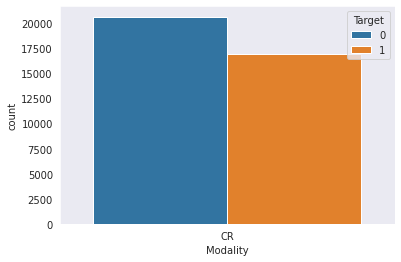

In [119]:
sns.countplot(x="Modality", data=Entiredata,hue="Target")

All Patients are checked with Computed radiography modality

In [120]:
print('BodyPartExamined` is: {}'.format(b['BodyPartExamined'].unique()[0]))

BodyPartExamined` is: CHEST


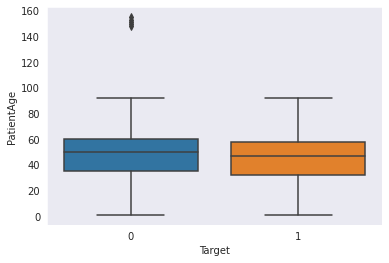

In [122]:
sns.boxplot(x="Target", y='PatientAge', data=Entiredata)

In [123]:
print('Minimum `PatientAge` in the training dataset: {}'.format(Entiredata['PatientAge'].min()))

Minimum `PatientAge` in the training dataset: 1


In [124]:
print('`PatientAge` in higher side for box plot: {}'.format(Entiredata['PatientAge'].quantile(0.75) + (Entiredata['PatientAge'].quantile(0.75) - Entiredata['PatientAge'].quantile(0.25))))

`PatientAge` in higher side for box plot: 85.0


There are some unique cases where patient age are above 140 but they belong to Normal or No lung opacity/Not normal class.

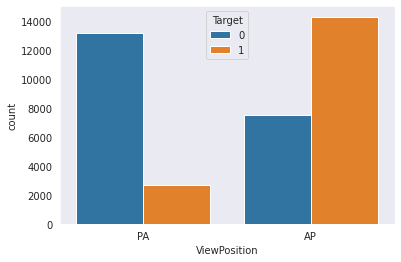

In [125]:
sns.countplot(x="ViewPosition", data=Entiredata,hue="Target")

In [126]:
Entiredata.groupby(['ViewPosition']).count() 

,patientId,x,y,width,height,Target,class,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ConversionType,HighBit,InstanceNumber,LossyImageCompression,LossyImageCompressionMethod,Modality,PatientAge,PatientBirthDate,PatientID,PatientName,PatientOrientation,PatientSex,PhotometricInterpretation,PixelData,PixelRepresentation,PixelSpacing,ReferringPhysicianName,Rows,SOPClassUID,SOPInstanceUID,SamplesPerPixel,SeriesDescription,SeriesInstanceUID,SeriesNumber,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
ViewPosition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AP,21817,14308,14308,14308,14308,21817,21817,0,21817,21817,21817,21817,21817,21817,21817,21817,21817,21817,21817,0,21817,21817,0,21817,21817,21817,21817,21817,0,21817,21817,21817,21817,21817,21817,21817,21817,21817,0,21817,21817
PA,15812,2649,2649,2649,2649,15812,15812,0,15812,15812,15812,15812,15812,15812,15812,15812,15812,15812,15812,0,15812,15812,0,15812,15812,15812,15812,15812,0,15812,15812,15812,15812,15812,15812,15812,15812,15812,0,15812,15812


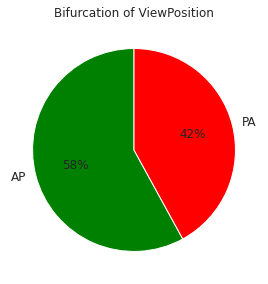

In [127]:
# Bifurcation of PA & AP variable
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(121)
g = (Entiredata['ViewPosition'].value_counts()
    .plot(kind = 'pie', autopct = '%.0f%%', 
          labels = ['AP', 'PA'], 
          colors = ['green', 'red'], 
          startangle = 90, 
          title = 'Bifurcation of ViewPosition', fontsize = 12)
    .set_ylabel(''))


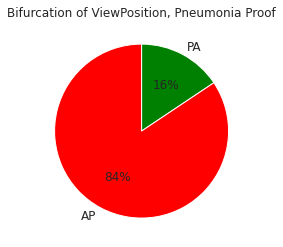

In [128]:
ax = fig.add_subplot(122)
g = (Entiredata.loc[Entiredata['Target'] == 1, 'ViewPosition']
     .value_counts().sort_index(ascending = False)
    .plot(kind = 'pie', autopct = '%.0f%%', 
          startangle = 90, counterclock = False, colors = ['green', 'red'], 
          title = 'Bifurcation of ViewPosition, Pneumonia Proof', 
          fontsize = 12)
    .set_ylabel(''))

Posterior/Anterior (PA):- Meaning of PA is the X-ray is taken from back of the Patient side.

Anterior/Posterior (AP):- Meaning of AP is the X-ray is taken from front (chest) side of the patient.

Patients are mostly examined with AP position.

Patients examined with AP position is having more lung opacity issue than PA.

It is always recommended to have PA posture X-ray than AP because of several good reasons, some of the vital reasons are 
1. It Reduces magnification of heart therefore preventing appearance of cardiomegaly. 

2. Reduces radiation dose to radiation sensitive organs such as thyroid,eyes,breasts.

3. Visualised maximum areas of lung. etc.

But due to health reasons, AP X-rays are taken 

84% of patients with AP view position variable have lung opacity

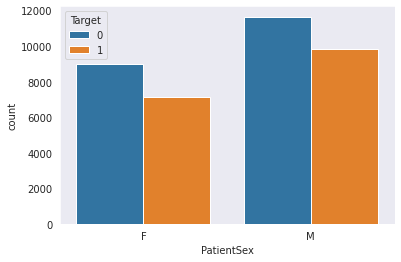

In [129]:
sns.countplot(x="PatientSex", data=Entiredata,hue="Target")

In [130]:
Entiredata.groupby(['PatientSex']).count() 

,patientId,x,y,width,height,Target,class,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ConversionType,HighBit,InstanceNumber,LossyImageCompression,LossyImageCompressionMethod,Modality,PatientAge,PatientBirthDate,PatientID,PatientName,PatientOrientation,PhotometricInterpretation,PixelData,PixelRepresentation,PixelSpacing,ReferringPhysicianName,Rows,SOPClassUID,SOPInstanceUID,SamplesPerPixel,SeriesDescription,SeriesInstanceUID,SeriesNumber,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime,ViewPosition
PatientSex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,16131,7115,7115,7115,7115,16131,16131,0,16131,16131,16131,16131,16131,16131,16131,16131,16131,16131,16131,0,16131,16131,0,16131,16131,16131,16131,0,16131,16131,16131,16131,16131,16131,16131,16131,16131,0,16131,16131,16131
M,21498,9842,9842,9842,9842,21498,21498,0,21498,21498,21498,21498,21498,21498,21498,21498,21498,21498,21498,0,21498,21498,0,21498,21498,21498,21498,0,21498,21498,21498,21498,21498,21498,21498,21498,21498,0,21498,21498,21498


Out of total patients, Male patients are having more Lung opacity evidence than Female

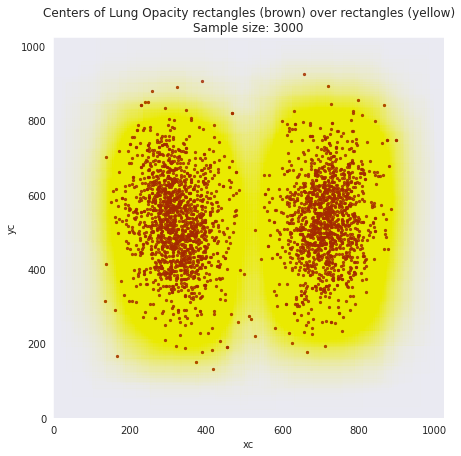

In [154]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,1,figsize=(7,7))
target_sample = bboxes.sample(3000)
target_sample['xc'] = target_sample['x'] + target_sample['width'] / 2
target_sample['yc'] = target_sample['y'] + target_sample['height'] / 2
plt.title("Centers of Lung Opacity rectangles (brown) over rectangles (yellow)\nSample size: 3000")
target_sample.plot.scatter(x='xc', y='yc', xlim=(0,1024), ylim=(0,1024), ax=ax, alpha=0.8, marker=".", color="brown")
for i, crt_sample in target_sample.iterrows():
    ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
                width=crt_sample['width'],height=crt_sample['height'],alpha=3.5e-3, color="yellow"))
plt.show()

AP & PA X-rays Overall ViewPosition is 58% & 42% respectively
For target=1, AP having most of the view positions